In [24]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Import the API key.
from config import weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#coordinates = zip(x, y)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a294f8e259de58017d6489f0b4d2b844


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | comodoro rivadavia
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | yumen
Processing Record 5 of Set 1 | padang
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | paranapanema
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | faanui
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | saint-leu
Processing Record 17 of Set 1 | hofn
Processing Record 18 of Set 1 | bareli
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | kavaratti
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | thompson
Process

Processing Record 38 of Set 4 | lasa
Processing Record 39 of Set 4 | constitucion
Processing Record 40 of Set 4 | lavrentiya
Processing Record 41 of Set 4 | yellowknife
Processing Record 42 of Set 4 | bria
Processing Record 43 of Set 4 | pinawa
Processing Record 44 of Set 4 | srednekolymsk
Processing Record 45 of Set 4 | alice springs
Processing Record 46 of Set 4 | bonavista
Processing Record 47 of Set 4 | tuggurt
City not found. Skipping...
Processing Record 48 of Set 4 | olinda
Processing Record 49 of Set 4 | tarrafal
Processing Record 50 of Set 4 | cap malheureux
Processing Record 1 of Set 5 | marcona
City not found. Skipping...
Processing Record 2 of Set 5 | san andres sajcabaja
Processing Record 3 of Set 5 | hamilton
Processing Record 4 of Set 5 | zhanaozen
Processing Record 5 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 6 of Set 5 | nexo
Processing Record 7 of Set 5 | traverse city
Processing Record 8 of Set 5 | george town
Processing Record 9 

Processing Record 19 of Set 8 | dwarka
Processing Record 20 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 21 of Set 8 | meulaboh
Processing Record 22 of Set 8 | keffi
Processing Record 23 of Set 8 | dusti
Processing Record 24 of Set 8 | hambantota
Processing Record 25 of Set 8 | puke
Processing Record 26 of Set 8 | ahipara
Processing Record 27 of Set 8 | tooele
Processing Record 28 of Set 8 | rio muerto
Processing Record 29 of Set 8 | shelburne
Processing Record 30 of Set 8 | general roca
Processing Record 31 of Set 8 | kropotkin
Processing Record 32 of Set 8 | los llanos de aridane
Processing Record 33 of Set 8 | halifax
Processing Record 34 of Set 8 | belyy yar
Processing Record 35 of Set 8 | kajaani
Processing Record 36 of Set 8 | alaca
Processing Record 37 of Set 8 | umm lajj
Processing Record 38 of Set 8 | eyl
Processing Record 39 of Set 8 | ayagoz
Processing Record 40 of Set 8 | mount gambier
Processing Record 41 of Set 8 | san miguel
Processing Record 42 of S

Processing Record 9 of Set 12 | tibagi
Processing Record 10 of Set 12 | aksha
Processing Record 11 of Set 12 | myanaung
Processing Record 12 of Set 12 | kalmunai
Processing Record 13 of Set 12 | opuwo
Processing Record 14 of Set 12 | chilmari
Processing Record 15 of Set 12 | vestmannaeyjar
Processing Record 16 of Set 12 | peniche
Processing Record 17 of Set 12 | fairview
Processing Record 18 of Set 12 | coquimbo
Processing Record 19 of Set 12 | neiafu
Processing Record 20 of Set 12 | conceicao do araguaia
Processing Record 21 of Set 12 | santo antonio do sudoeste
Processing Record 22 of Set 12 | tilichiki
Processing Record 23 of Set 12 | anadyr
Processing Record 24 of Set 12 | londiani
Processing Record 25 of Set 12 | rennes
Processing Record 26 of Set 12 | santa barbara
Processing Record 27 of Set 12 | tabou
Processing Record 28 of Set 12 | yuli
Processing Record 29 of Set 12 | san quintin
Processing Record 30 of Set 12 | yanam
Processing Record 31 of Set 12 | sawakin
Processing Recor

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,75.76,75,98,7.85,PF,2021-12-05 18:37:23
1,Comodoro Rivadavia,-45.8667,-67.5000,73.26,33,20,20.71,AR,2021-12-05 18:36:16
2,Saint-Philippe,-21.3585,55.7679,78.39,79,38,10.04,RE,2021-12-05 18:36:46
3,Yumen,40.2833,97.2000,27.61,47,23,22.17,CN,2021-12-05 18:37:24
4,Padang,-0.9492,100.3543,73.45,87,99,2.46,ID,2021-12-05 18:37:24
5,Busselton,-33.6500,115.3333,61.05,83,29,15.75,AU,2021-12-05 18:37:24
6,East London,-33.0153,27.9116,70.74,100,75,4.61,ZA,2021-12-05 18:37:25
7,Paranapanema,-23.3886,-48.7228,91.18,25,53,1.45,BR,2021-12-05 18:37:25
8,Mataura,-46.1927,168.8643,45.48,95,100,2.26,NZ,2021-12-05 18:37:26
9,Faanui,-16.4833,-151.7500,80.46,73,84,17.09,PF,2021-12-05 18:37:26


In [10]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-12-05 18:37:23,-23.1203,-134.9692,75.76,75,98,7.85
1,Comodoro Rivadavia,AR,2021-12-05 18:36:16,-45.8667,-67.5000,73.26,33,20,20.71
2,Saint-Philippe,RE,2021-12-05 18:36:46,-21.3585,55.7679,78.39,79,38,10.04
3,Yumen,CN,2021-12-05 18:37:24,40.2833,97.2000,27.61,47,23,22.17
4,Padang,ID,2021-12-05 18:37:24,-0.9492,100.3543,73.45,87,99,2.46
5,Busselton,AU,2021-12-05 18:37:24,-33.6500,115.3333,61.05,83,29,15.75
6,East London,ZA,2021-12-05 18:37:25,-33.0153,27.9116,70.74,100,75,4.61
7,Paranapanema,BR,2021-12-05 18:37:25,-23.3886,-48.7228,91.18,25,53,1.45
8,Mataura,NZ,2021-12-05 18:37:26,-46.1927,168.8643,45.48,95,100,2.26
9,Faanui,PF,2021-12-05 18:37:26,-16.4833,-151.7500,80.46,73,84,17.09


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

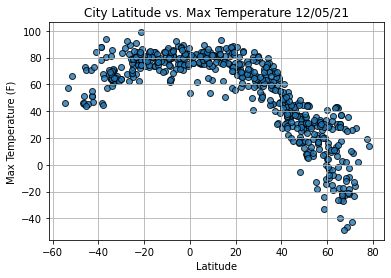

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

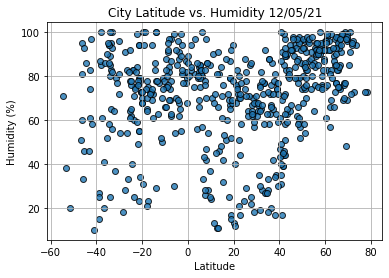

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

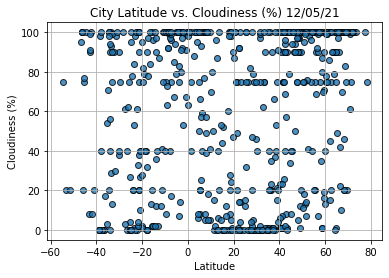

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

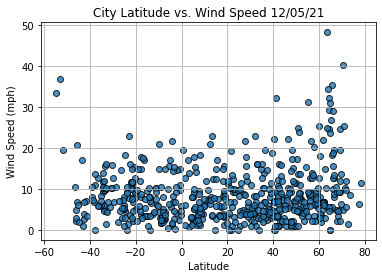

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [36]:
linregress(x_values, y_values)

LinregressResult(slope=0.44681697156970834, intercept=83.97829546524923, rvalue=0.5483311500339267, pvalue=5.439422169292472e-16, stderr=0.050236552292522656, intercept_stderr=1.2617671206858356)

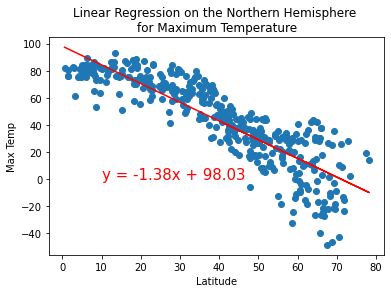

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,0))

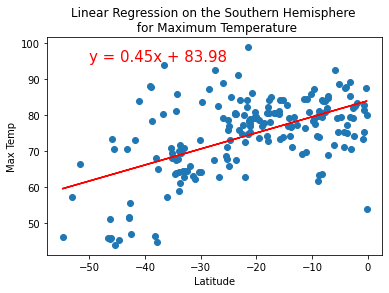

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,95))

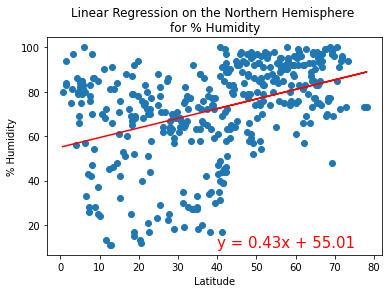

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

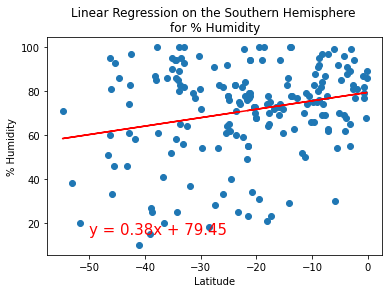

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

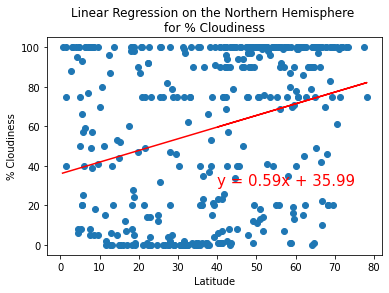

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,30))

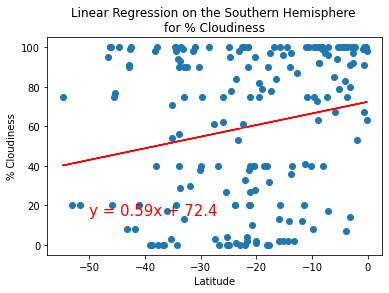

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,15))

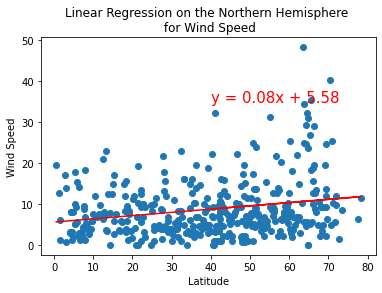

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

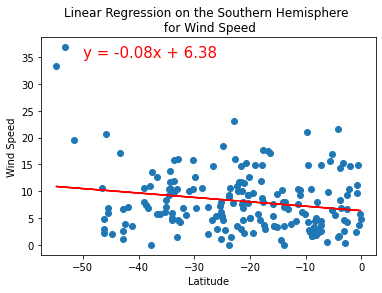

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))